### 🧰 Step 1: Importing Libraries

In this step, I imported the essential Python libraries for data analysis and visualization:

- **pandas** → for data manipulation  
- **numpy** → for numerical operations  
- **matplotlib & seaborn** → for clean, professional visualizations  

I also applied a default seaborn style to keep the visualizations clean and consistent.


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


plt.style.use('seaborn-v0_8')


### 📂 Step 2: Loading the Dataset

Here I loaded the *Olympics Dataset (`athlete_events.csv`)*, which contains data of over **271,000 athlete entries** from **1896 to 2016**.

Key Actions:
- Used `pd.read_csv()` to load the file.  
- Verified dataset structure using `df.head()`.

**Columns:** ID, Name, Sex, Age, Height, Weight, Team, NOC, Games, Year, Season, City, Sport, Event, Medal.


In [65]:
file_path = 'athlete_events.csv'  # make sure the file is in the same folder as the notebook
df = pd.read_csv(file_path)
df.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### 🧾 Step 3: Data Inspection

I used:
- `df.info()` → To check column types and missing values.  
- `df.describe()` → To get descriptive statistics of numerical columns.  
- `df.isnull().sum()` → To understand missing data distribution.

**Key Findings:**
- No missing values in critical columns like `Team`, `Year`, `Sport`.  
- Missing values in `Age`, `Height`, `Weight` and `Medal`.  
- `Medal` column has missing values for non-medalists (expected).


In [66]:
df.info()
df.describe()
df.isnull().sum().head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

### 🛡️ Step 4: Protecting Raw Data

To maintain clean workflow and data integrity:
- Kept `df_raw` as the untouched original dataset.  
- Worked with `df` as a separate exploration copy.  
- Created `medal_data` for medal-based analysis.  
- Created `age_series` to handle missing Age values without altering raw data.

This step ensures **reproducibility** and allows for **safe experimentation**.


In [67]:
df_raw = pd.read_csv('athlete_events.csv')  # raw stays untouched
df = df_raw.copy()                          # working copy for exploration


### 🧼 Step 5: Handling Missing Data (Smartly)

I used a **non-destructive approach** to handle missing values:

- Derived `Age_imputed` column using median age (instead of overwriting).  
- Skipped imputing Height & Weight for now due to large missing percentage.  
- Used `medal_data` to filter only rows where Medal is not null.

**Why this is good practice:**
- It keeps raw data intact.  
- Allows transparent tracking of changes.  
- Prevents introducing noise into the dataset.

---

👉 With this step complete, the dataset is clean and structured — ready for visual exploration.


In [68]:
# Option A: Derived column (preferred for transparency)
df = df.assign(Age_imputed = df['Age'].fillna(df['Age'].median()))

# Option B: Separate working dataframe
df_age = df.copy()
df_age['Age'] = df_age['Age'].fillna(df_age['Age'].median())


In [69]:
# Step 5: Final cleaned helper datasets
medal_data = df[df['Medal'].notna()]    # for medal analysisb
age_series = df['Age'].dropna()         # for age distribution
# no need to reload df again

---

## 🧪 Step 5.1: Final Data Validation & Cleanup

Before moving to **Step 6: Medal Trends Visualization**, it’s important to ensure our dataset is fully clean and reliable.

### 🎯 Objectives of this step:
- ✅ Validate the overall **structure** of the dataset  
- ✅ Check for **null values**, **duplicates**, and **data types**  
- ✅ Confirm **unique value counts** for key columns (e.g., NOC, Sports, Years, Medal)  
- 🧼 Remove duplicate rows for clean aggregations  
- 🛡️ Ensure the dataset is consistent for storytelling and visualization

This step adds **credibility and quality control** to the analysis — a key part of professional data projects.

---


In [70]:
# ============================================================
# ✅ FINAL DATA VALIDATION & CLEANUP 
# ============================================================
# Purpose:
# Before starting visualization (Step 6), it's important to:
#   1. Validate the shape, null values, data types, and unique counts
#   2. Remove any duplicate rows for clean and consistent analysis
#   3. Confirm the final structure after cleanup
# ------------------------------------------------------------

print(" Final Dataset Sanity Check — BEFORE Cleanup\n")

# 1. Check shape of dataset
print("Shape:", df.shape)

# 2. Null value distribution (Top 10 columns with most nulls)
print("\nTop Null Value Columns:\n", df.isnull().sum().sort_values(ascending=False).head(10))

# 3. Check duplicate rows
print("\nDuplicate rows:", df.duplicated().sum())

# 4. Data types of first 10 columns
print("\nData types:\n", df.dtypes.head(10))

# 5. Unique counts of key categorical columns
print("\nUnique NOC codes:", df['NOC'].nunique())
print("Unique Sports:", df['Sport'].nunique())
print("Unique Years:", df['Year'].nunique())
print("Unique Medal categories:", df['Medal'].nunique())

# ------------------------------------------------------------
# 🧹 Step 2: Remove Duplicate Rows
# ------------------------------------------------------------
# There are around 1,385 duplicate rows. Removing them ensures:
#   - Accurate aggregations
#   - Cleaner visualizations
#   - Consistency with best data hygiene practices

df.drop_duplicates(inplace=True)

print("\n Duplicate rows removed successfully!")

# ------------------------------------------------------------
# ✅ Step 3: Re-validate after cleanup
# ------------------------------------------------------------

print("\n Sanity Check — AFTER Duplicate Removal")
print("Shape:", df.shape)
print("Duplicate rows remaining:", df.duplicated().sum())
print("Null values in Medal column (expected):", df['Medal'].isnull().sum())
print("Unique NOC codes:", df['NOC'].nunique())
print("Unique Sports:", df['Sport'].nunique())
print("Unique Years:", df['Year'].nunique())
print("Unique Medal categories:", df['Medal'].nunique())

# ------------------------------------------------------------
# 📌 NOTE:
# - Medal nulls are expected for non-medalists (do not impute).
# - Height & Weight nulls are left as-is (large % missing).
# - Age nulls already handled via Age_imputed column.
# - Dataset is now clean and ready for visualization.
# ============================================================


 Final Dataset Sanity Check — BEFORE Cleanup

Shape: (271116, 16)

Top Null Value Columns:
 Medal     231333
Weight     62875
Height     60171
Age         9474
Sex            0
Name           0
Team           0
ID             0
NOC            0
Games          0
dtype: int64

Duplicate rows: 1385

Data types:
 ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
dtype: object

Unique NOC codes: 230
Unique Sports: 66
Unique Years: 35
Unique Medal categories: 3

 Duplicate rows removed successfully!

 Sanity Check — AFTER Duplicate Removal
Shape: (269731, 16)
Duplicate rows remaining: 0
Null values in Medal column (expected): 229959
Unique NOC codes: 230
Unique Sports: 66
Unique Years: 35
Unique Medal categories: 3


---

## 🏅 Step 6: Medal Trends Over Time

In this step, we analyze how **total Olympic medals** have evolved across history from **1896 to 2016**, and compare **Summer vs Winter Games**.  

### 🎯 Objectives:
- Visualize overall medal growth across years.  
- Highlight patterns caused by major historical events (e.g., World Wars).  
- Compare Summer vs Winter Games medal counts.  
- Smooth out year-to-year fluctuations using a **rolling average**.

### 🧠 Why this matters:
- Shows **how the Olympics have expanded** over time (more events, more medals).  
- Helps understand how medal trends reflect global and historical shifts.  
- Lays the foundation for deeper country and sport-level analysis.

---


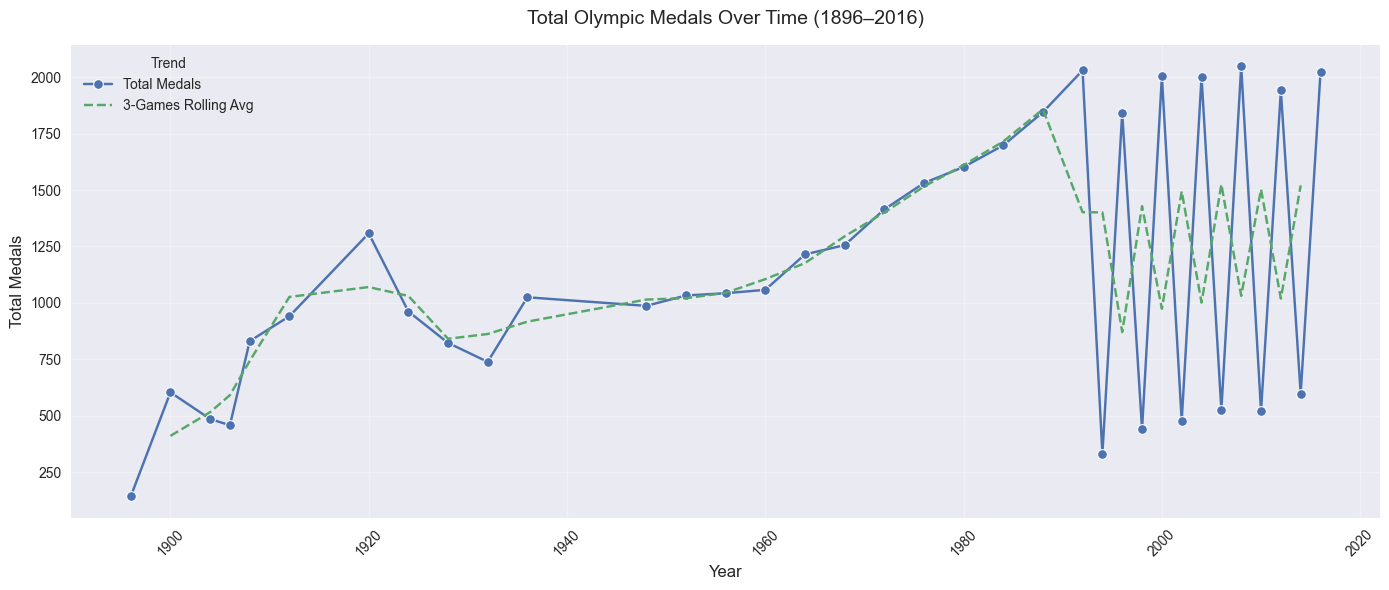

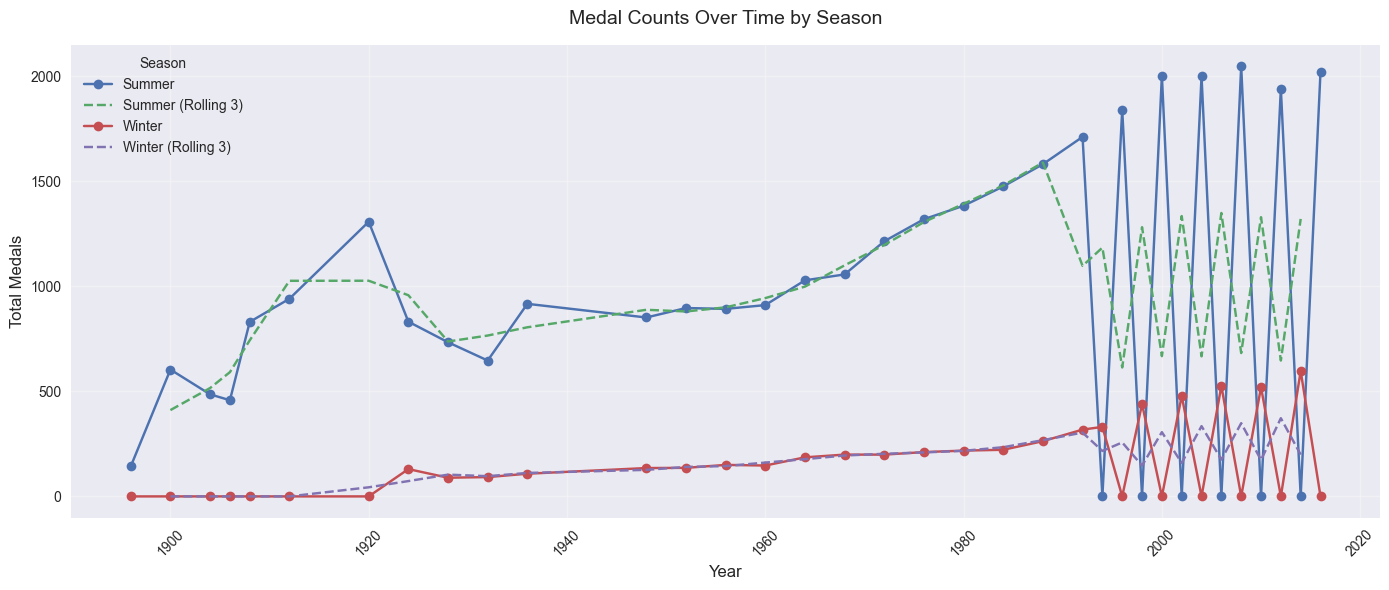

Built medal_data rows: 39783
Medals_by_year range: 1896 - 2016
pivot_season columns: ['Summer', 'Winter']


In [72]:
# ============================================================
# STEP 6 (streamlined) — Build required dataframes if missing & plot
# - No imports here (assumes pandas/seaborn/matplotlib already imported earlier)
# ============================================================

# Safety: ensure the main DataFrame exists
if 'df' not in globals():
    raise NameError("DataFrame 'df' not found. Please run the top cells that load the dataset first.")

# Recreate medal_data and aggregated tables if they don't exist or to ensure they are up-to-date
# (We rebuild if missing to avoid NameError after kernel restart or out-of-order execution)
if 'medal_data' not in globals() or medal_data is None:
    medal_data = df[df['Medal'].notna()].copy()

# Build medals_by_year (overall medal counts per year)
if 'medals_by_year' not in globals() or medals_by_year is None:
    medals_by_year = (
        medal_data
        .groupby('Year')
        .size()
        .reset_index(name='Medal_Count')
        .sort_values('Year')
    )

# Add rolling average column if not present (safe to recompute)
if 'Medals_rolling3' not in medals_by_year.columns:
    if len(medals_by_year) >= 3:
        medals_by_year['Medals_rolling3'] = medals_by_year['Medal_Count'].rolling(window=3, center=True).mean()
    else:
        medals_by_year['Medals_rolling3'] = medals_by_year['Medal_Count']

# Build pivot_season (Year x Season) for Summer vs Winter comparison
if 'pivot_season' not in globals() or pivot_season is None:
    medals_by_year_season = (
        medal_data
        .groupby(['Year', 'Season'])
        .size()
        .reset_index(name='Medal_Count')
        .sort_values(['Year', 'Season'])
    )
    pivot_season = medals_by_year_season.pivot(index='Year', columns='Season', values='Medal_Count').fillna(0)

# ---------------------------
# Plot: Overall medal trend
# ---------------------------
plt.figure(figsize=(14,6))
sns.lineplot(data=medals_by_year, x='Year', y='Medal_Count', marker='o', label='Total Medals')

# plot rolling avg if present
if 'Medals_rolling3' in medals_by_year.columns:
    sns.lineplot(data=medals_by_year, x='Year', y='Medals_rolling3', linestyle='--', label='3-Games Rolling Avg')

plt.title('Total Olympic Medals Over Time (1896–2016)', fontsize=14, pad=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Medals', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend(title='Trend', loc='best')
plt.tight_layout()
plt.show()

# ---------------------------------------
# Plot: Summer vs Winter medal trend
# ---------------------------------------
plt.figure(figsize=(14,6))

years = pivot_season.index
if 'Summer' in pivot_season.columns:
    plt.plot(years, pivot_season['Summer'], marker='o', label='Summer')
    plt.plot(years, pivot_season['Summer'].rolling(3, center=True).mean(), linestyle='--', label='Summer (Rolling 3)')
if 'Winter' in pivot_season.columns:
    plt.plot(years, pivot_season['Winter'], marker='o', label='Winter')
    plt.plot(years, pivot_season['Winter'].rolling(3, center=True).mean(), linestyle='--', label='Winter (Rolling 3)')

plt.title('Medal Counts Over Time by Season', fontsize=14, pad=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Medals', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Season', loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ---------------------------
# Quick sanity print
# ---------------------------
print(f"Built medal_data rows: {medal_data.shape[0]}")
print(f"Medals_by_year range: {medals_by_year['Year'].min()} - {medals_by_year['Year'].max()}")
print("pivot_season columns:", list(pivot_season.columns))


🪄 *Visualization Polish Applied — Improved readability, consistent labels, and rolling averages for better trend analysis.*


---

## 🏳️ Step 7: Top Countries by Total Medals

In this step, we identify the countries (NOCs) with the highest total medal counts and examine the distribution of 🥇 Gold, 🥈 Silver, and 🥉 Bronze among the top performers.

### 🎯 Objectives:
- Rank countries by total historical medals.
- Visualize the 🏆 Top 10 NOCs.
- Show a stacked breakdown of Gold / Silver / Bronze for those Top 10.

### 🧠 Notes / Caveats:
- NOC codes reflect historical entities (e.g., URS, FRG) and may differ from modern countries.
- High medal counts can reflect broader participation and event density, not just dominance.

---


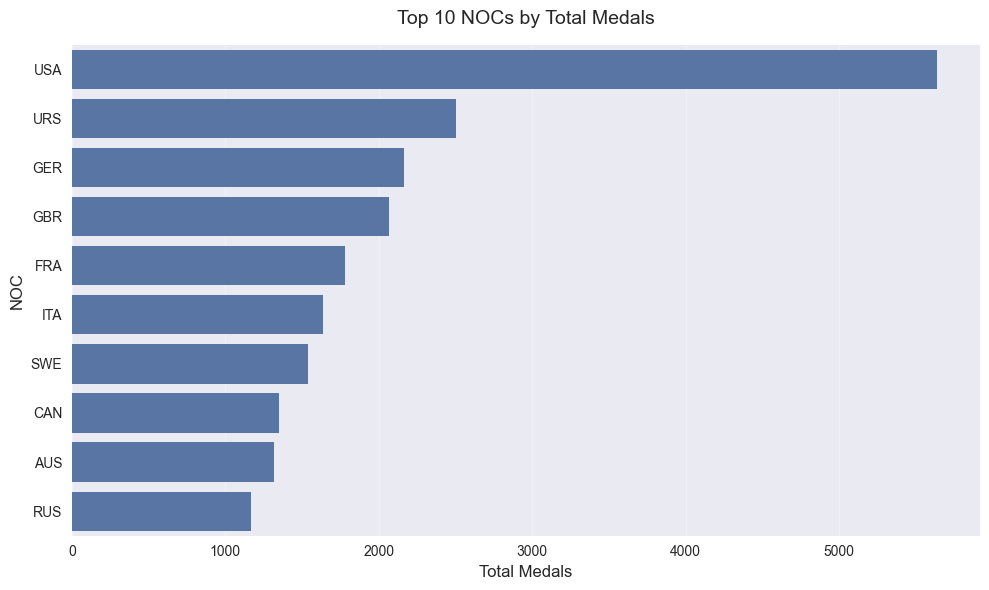

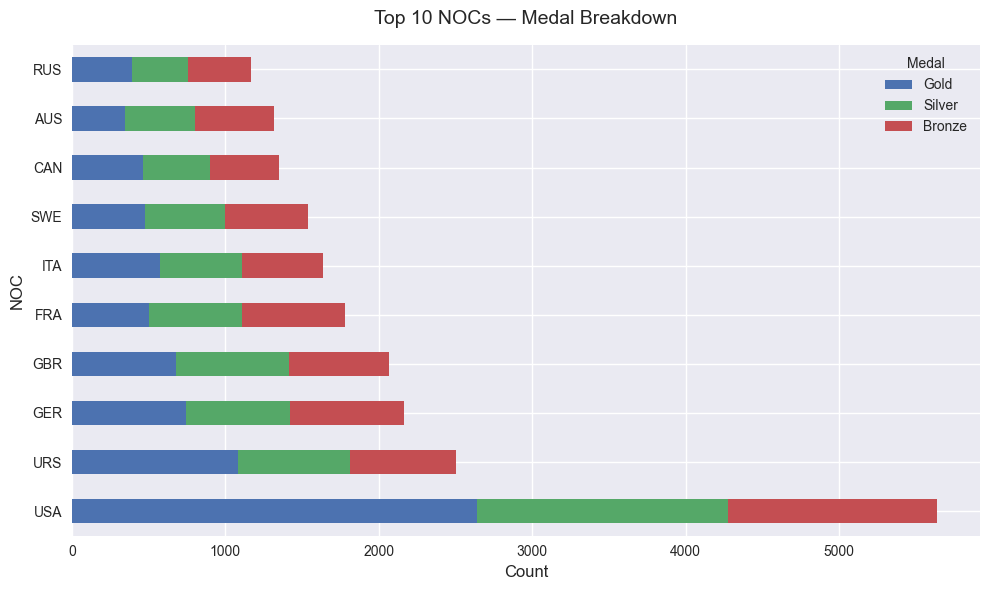

In [73]:
# ============================================================
# STEP 7: TOP COUNTRIES BY TOTAL MEDALS — Polished Visuals
# ============================================================

# This step expects the DataFrame `medal_data` (rows with non-null Medal).
# If it's not present for some reason, create it from df:
if 'medal_data' not in globals():
    medal_data = df[df['Medal'].notna()].copy()

# -------------------------------
# 7A. Compute Top 10 NOCs by total medals
# -------------------------------
top_noc = (
    medal_data.groupby('NOC')
    .size()
    .reset_index(name='Medals')
    .sort_values('Medals', ascending=False)
    .head(10)
)

# -------------------------------
# 7A. Plot Top 10 NOCs (Total Medals)
# -------------------------------
plt.figure(figsize=(10,6))
sns.barplot(data=top_noc, x='Medals', y='NOC')

plt.title('Top 10 NOCs by Total Medals', fontsize=14, pad=15)
plt.xlabel('Total Medals', fontsize=12)
plt.ylabel('NOC', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# -------------------------------
# 7B. Stacked Medal Breakdown (Gold/Silver/Bronze) for the Top 10 NOCs
# -------------------------------
top_noc_codes = top_noc['NOC'].tolist()

breakdown = (
    medal_data[medal_data['NOC'].isin(top_noc_codes)]
    .pivot_table(
        index='NOC',
        columns='Medal',
        values='ID',          # count unique rows (ID is fine here)
        aggfunc='count',
        fill_value=0
    )
    .reindex(top_noc_codes)   # keep same order as top_noc
)

# Ensure consistent medal column order
for col in ['Gold', 'Silver', 'Bronze']:
    if col not in breakdown.columns:
        breakdown[col] = 0
breakdown = breakdown[['Gold', 'Silver', 'Bronze']]

# Plot stacked horizontal bars using pandas
ax = breakdown.plot(kind='barh', stacked=True, figsize=(10,6))
ax.set_title('Top 10 NOCs — Medal Breakdown', fontsize=14, pad=15)
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('NOC', fontsize=12)
plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# Notes:
# - The first chart ranks countries by total medals (all types combined).
# - The second chart shows the composition of medals for each top NOC.
# - Using a horizontal layout improves label readability for country codes.
# ============================================================


---

## 🏃 Step 8: Top Sports by Total Medals

In this step, we identify which 🏋️‍♂️ sports have historically produced the most medals.

### 🎯 Objectives:
- Rank sports by total medal counts.
- Visualize the 🥇 Top 10 sports.

### 🧠 Notes / Caveats:
- Sports with many events (e.g., Athletics 🏃, Swimming 🏊) naturally accumulate more medals.
- Counts reflect both depth (number of events) and breadth (participation).

---


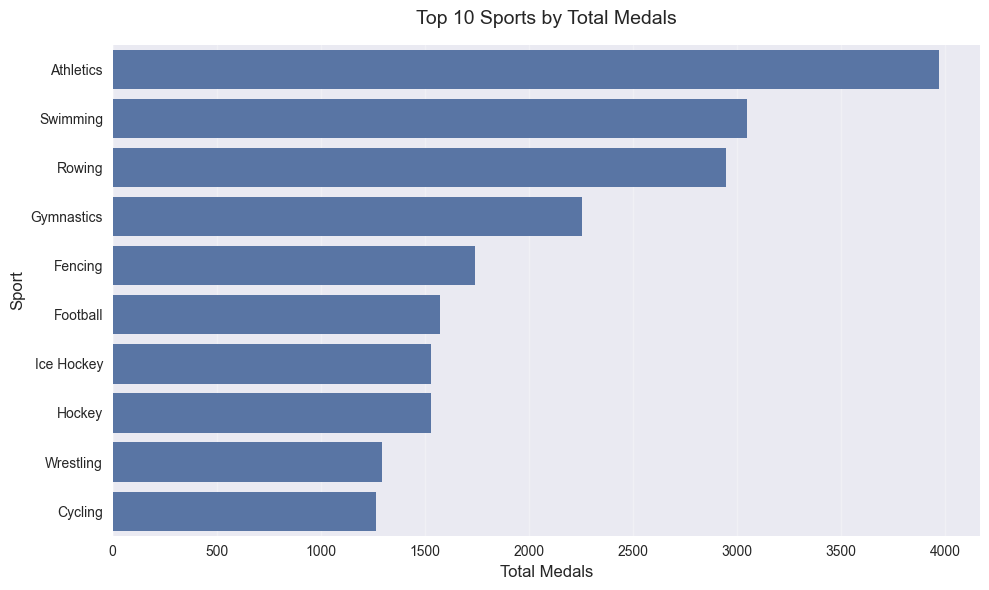

In [74]:
# ============================================================
# STEP 8: TOP SPORTS BY TOTAL MEDALS — Polished Visuals
# ============================================================

# Ensure medal_data exists (non-null Medal rows)
if 'medal_data' not in globals():
    medal_data = df[df['Medal'].notna()].copy()

# -------------------------------
# 8A. Compute Top 10 Sports by total medals
# -------------------------------
top_sports = (
    medal_data['Sport']
      .value_counts()
      .head(10)
      .to_frame(name='Medals')      # make it a DataFrame with column 'Medals'
      .reset_index()
      .rename(columns={'index': 'Sport'})
)

# Optional sanity check print
# print(top_sports.head())

# -------------------------------
# 8B. Plot Top 10 Sports (Total Medals)
# -------------------------------
plt.figure(figsize=(10,6))
sns.barplot(data=top_sports, x='Medals', y='Sport')

plt.title('Top 10 Sports by Total Medals', fontsize=14, pad=15)
plt.xlabel('Total Medals', fontsize=12)
plt.ylabel('Sport', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# Notes:
# - This chart highlights sports with the highest medal density.
# - If you need per-season views, split by 'Season' before counting.
# - For fair comparisons over time, consider normalizing by number of events.
# ============================================================


---

## 🚹🚺 Step 9: Gender Participation Over Time

In this step, we analyze how athlete participation by gender has evolved across Olympic history.

### 🎯 Objectives:
- Count unique athletes per **Year × Sex**.
- Visualize **Male vs Female** participation trends.
- Observe inflection points (policy changes, inclusion of women’s events, global events).

### 🧠 Notes / Caveats:
- We count **unique athletes** (by `ID`) per year to avoid double-counting multiple events.
- Missing or rare values in `Sex` (if any) are excluded from the trend chart.
- Steady rise in female participation typically appears from the late 20th century onward.

---


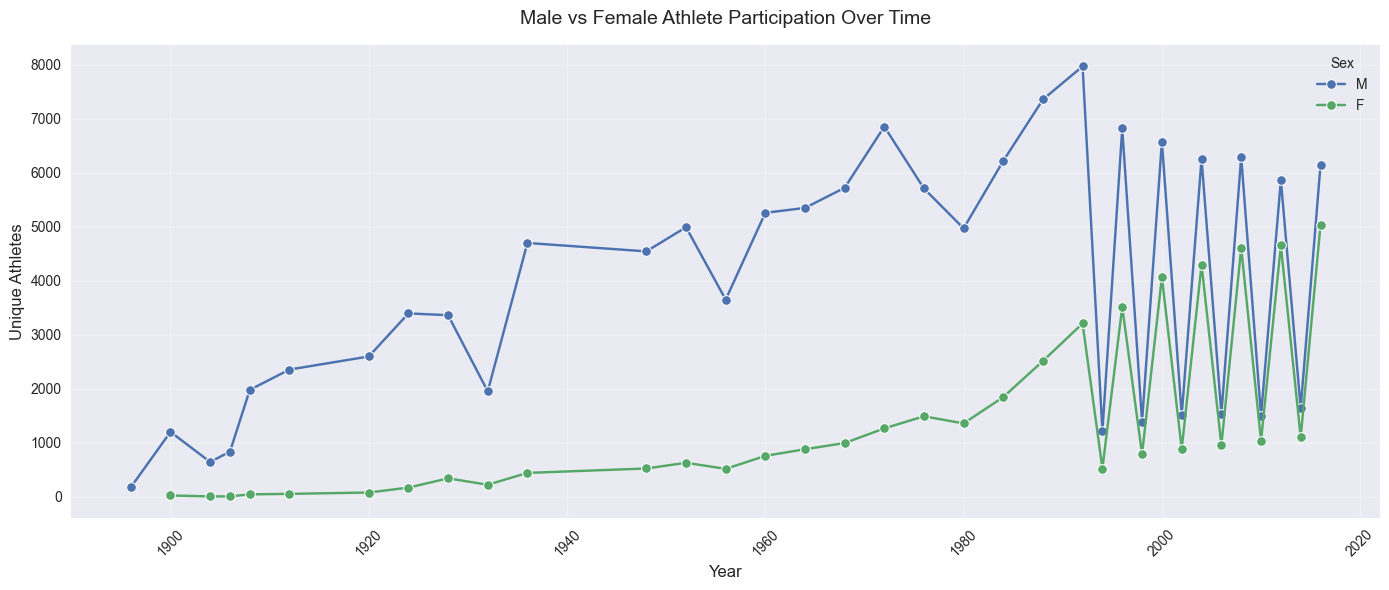

In [75]:
# ============================================================
# STEP 9: GENDER PARTICIPATION OVER TIME — Polished Visuals
# ============================================================

# Safety: ensure required columns exist
required_cols = {'Year', 'Sex', 'ID'}
if not required_cols.issubset(df.columns):
    raise ValueError(f"Missing required columns for Step 9: {required_cols - set(df.columns)}")

# -------------------------------
# 9A. Build Year × Sex unique-athlete counts
# -------------------------------
# Drop rows with missing Sex (if any), because we want a clean male/female split
df_gender = df.dropna(subset=['Sex']).copy()

gender_trend = (
    df_gender.groupby(['Year', 'Sex'])['ID']
    .nunique()  # unique athletes per Year × Sex
    .reset_index(name='Unique_Athletes')
    .sort_values(['Year', 'Sex'])
)

# Optional sanity check
# display(gender_trend.head())

# -------------------------------
# 9B. Plot Male vs Female Participation Trend
# -------------------------------
plt.figure(figsize=(14,6))
sns.lineplot(
    data=gender_trend,
    x='Year',
    y='Unique_Athletes',
    hue='Sex',
    marker='o'
)

plt.title('Male vs Female Athlete Participation Over Time', fontsize=14, pad=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Unique Athletes', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Sex', loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# Notes:
# - Using nunique on athlete ID avoids inflated counts from multiple events.
# - Rotated ticks improve readability for dense year labels.
# - Keep titles emoji-free to avoid font glyph warnings on export.
# ============================================================


---

## 🧓 Step 10: Age Distribution of Olympic Athletes

In this step, we explore the age characteristics of Olympic athletes and compare medalists vs non-medalists.

### 🎯 Objectives:
- Understand the **overall age distribution** of athletes.
- Compare **medalists vs all athletes** to identify performance age trends.
- Visualize age spread and outliers with boxplots.

### 🧠 Notes / Caveats:
- Some athletes have missing age values; these are excluded from the plots.
- Medalists often cluster around a narrower age range (peak performance years).
- The distribution can differ significantly by sport or discipline (beyond this step).

---


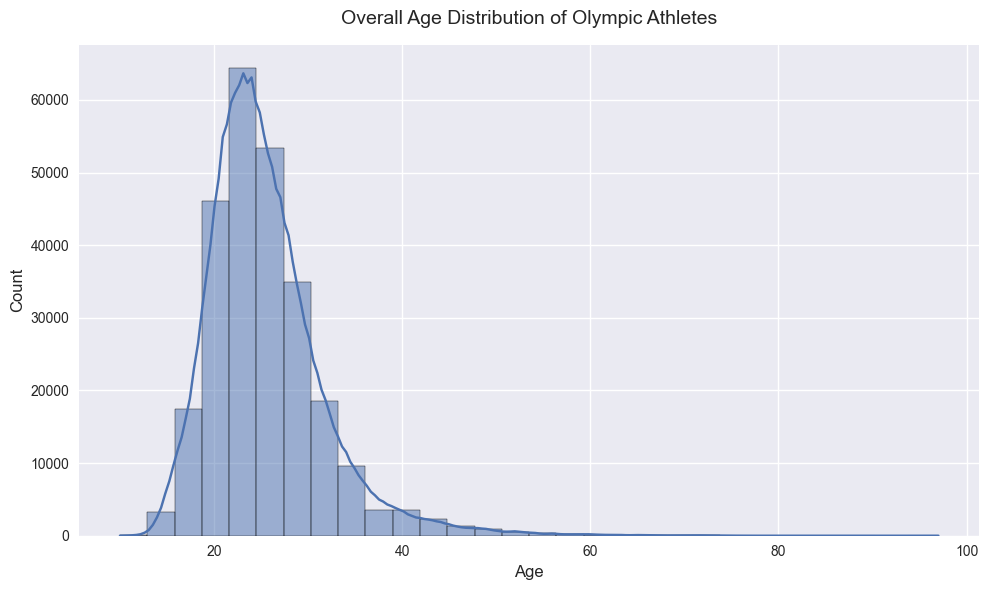

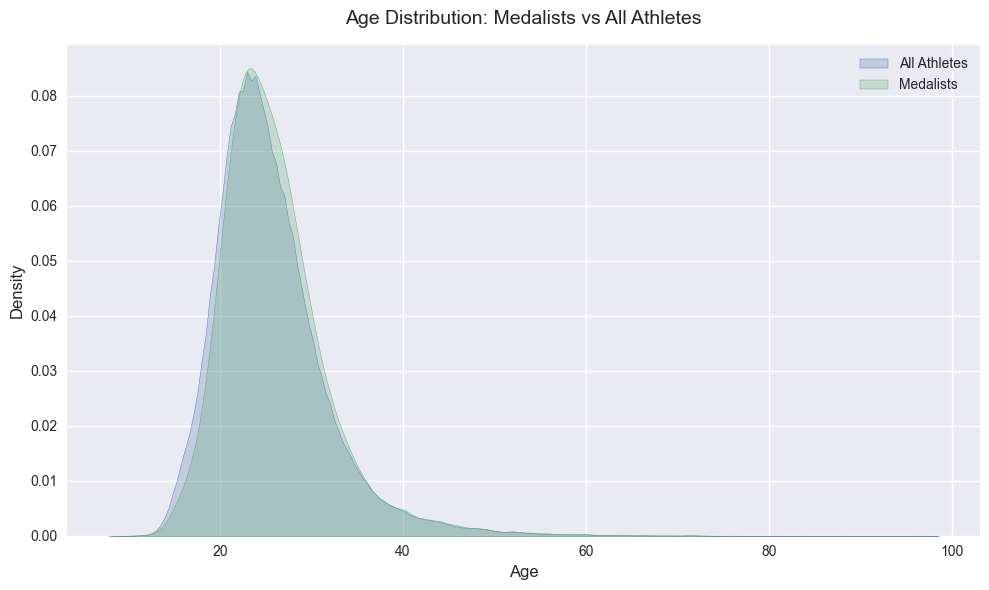

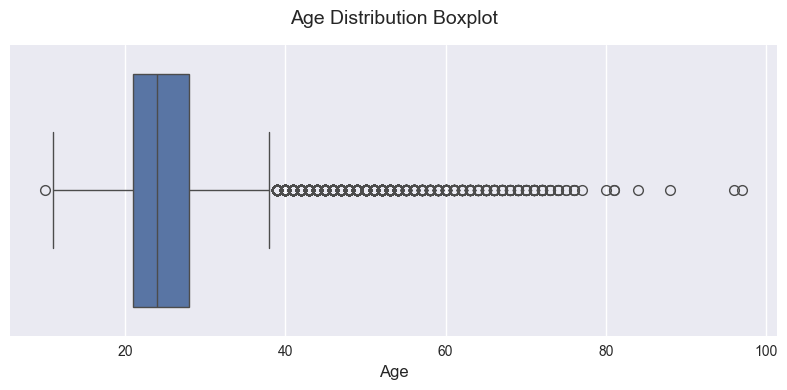

In [76]:
# ============================================================
# STEP 10: AGE DISTRIBUTION OF OLYMPIC ATHLETES — Polished Visuals
# ============================================================

# Safety checks
if 'Age' not in df.columns:
    raise ValueError("Column 'Age' not found in dataset")

# -------------------------------
# 10A. Prepare Age Data
# -------------------------------
# Drop missing ages for overall distribution
age_series = df['Age'].dropna()

# Medalist ages
if 'medal_data' not in globals():
    medal_data = df[df['Medal'].notna()].copy()

medal_age = medal_data['Age'].dropna()

# -------------------------------
# 10B. Histogram + KDE of overall age
# -------------------------------
plt.figure(figsize=(10,6))
sns.histplot(age_series, bins=30, kde=True)
plt.title('Overall Age Distribution of Olympic Athletes', fontsize=14, pad=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

# -------------------------------
# 10C. KDE: Medalists vs All Athletes
# -------------------------------
plt.figure(figsize=(10,6))
sns.kdeplot(x=age_series, label='All Athletes', fill=True)
sns.kdeplot(x=medal_age, label='Medalists', fill=True)
plt.title('Age Distribution: Medalists vs All Athletes', fontsize=14, pad=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# -------------------------------
# 10D. Boxplot of Age Distribution
# -------------------------------
plt.figure(figsize=(8,4))
sns.boxplot(x=age_series)
plt.title('Age Distribution Boxplot', fontsize=14, pad=15)
plt.xlabel('Age', fontsize=12)
plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# Notes:
# - Histogram gives a quick overview of the distribution shape.
# - KDE comparison highlights differences between medalists and all participants.
# - Boxplot summarizes median, quartiles, and outliers cleanly.
# ============================================================


---

## 🧭 Step 11: ERD & Project Context Section

This step documents the **entity-relationship structure** and overall **narrative** of the Olympics Data Analysis project.  
A clear ERD and well-defined context make the project **easy to understand**, **reproducible**, and **portfolio-ready**.

---

### 🏅 Executive Summary (ERD Overview)

The **Olympics Data Model** represents a normalized relational schema capturing 120 years of Olympic history.  
It organizes data across key entities — *Athlete*, *Country (NOC)*, *Games*, *Sport*, *Event*, and *Participation* — ensuring referential integrity and eliminating redundancy.  
The *Participation* table acts as the central bridge connecting all dimensions, enabling deep analytical insights into medals, performance trends, and athlete participation over time.

---

### 🧱 ERD (Entity-Relationship Diagram)

The ERD illustrates the logical structure of the dataset used for analysis.  
In this project:

- Each **athlete** is represented by an `ID`.  
- Athletes participate in multiple **Games** (year × season).  
- Each participation is associated with:  
  - `Team` and `NOC` (country code)  
  - `Sport` and `Event`  
  - Optional `Medal` (Gold, Silver, Bronze)  
- **One-to-many relationships** exist between:  
  - NOC → Athletes  
  - Games → Events  
  - Athlete → Medals  

---

### 📌 Context Summary

- 🗂️ **Dataset:** `athlete_events.csv` (1896–2016, 271,116 entries)  
- 🧑‍🤝‍🧑 **Entities:** Athletes, Games, Events, Teams, Medals  
- 🧹 **Prep Steps:** Cleaning, imputation, duplicate removal, validation  
- 📊 **Analysis:** Medal trends, gender evolution, top countries, top sports, age distribution  
- 📝 **Outcome:** Insightful trends and clean visual story, exportable as a final report.

---

### 🧩 Notes

- Sport in **Participation** is derived from **Event** (used for convenience in grouping).  
- Composite Primary Key of **Participation:** `(AthleteID, Games, Event)` ensures unique records.

---


In [77]:
# ============================================================
# 📊 Display Olympics ERD — Clean, Centered & Scaled
# ============================================================

from IPython.display import display, HTML

# HTML ensures the image appears centered with a caption
display(HTML("""
<div style="text-align: center; margin-top: 10px; margin-bottom: 10px;">
    <img src="olympics_erd_final.png" alt="Olympics ERD Diagram"
         style="width: 80%; max-width: 900px; border: 1px solid #ddd; border-radius: 8px; box-shadow: 0 2px 8px rgba(0,0,0,0.15);">
    <p style="font-size: 13px; color: #555; margin-top: 8px;">
        <b>Figure:</b> Olympics ERD — A normalized data model connecting Athletes, Games, Events, and NOCs through the Participation bridge table.
    </p>
</div>
"""))


---

## 🧮 Block 2: SQL Practice — Real Dataset Version

In this section, we’ll reinforce **SQL JOIN and aggregation concepts** using our **real Olympic dataset** (`athlete_events.csv`).  
Instead of toy tables, we’ll query actual 120 years of Olympic history using SQLite — directly inside Python.  

This will give us hands-on experience in:
- Writing SQL on real data,
- Understanding relational structures,
- and extracting analytical insights for our project deliverables.

---


In [15]:
# ============================================================
# ⚙️ STEP 1 — Load Cleaned Olympics Data into SQLite
# ============================================================

import sqlite3
import pandas as pd

# Load dataset
df = pd.read_csv('athlete_events.csv')

# Create SQLite in-memory connection
conn = sqlite3.connect(':memory:')

# Save DataFrame to SQL table
df.to_sql('olympics', conn, index=False, if_exists='replace')

print("✅ Olympics dataset loaded into SQLite successfully!")
print("Shape:", df.shape)


✅ Olympics dataset loaded into SQLite successfully!
Shape: (271116, 15)


In [18]:
query = "SELECT * FROM olympics LIMIT 5;"
pd.read_sql_query(query, conn)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None


In [19]:
query = """
SELECT NOC AS Country,
       COUNT(Medal) AS Total_Medals
FROM olympics
WHERE Medal IS NOT NULL
GROUP BY NOC
ORDER BY Total_Medals DESC
LIMIT 10;
"""
pd.read_sql_query(query, conn)

,Country,Total_Medals
0,USA,5637
1,URS,2503
2,GER,2165
3,GBR,2068
4,FRA,1777
5,ITA,1637
6,SWE,1536
7,CAN,1352
8,AUS,1320
9,RUS,1165


In [6]:
query = """
SELECT Year,
       COUNT(Medal) AS Total_Medals
FROM olympics
WHERE Medal IS NOT NULL
GROUP BY Year
ORDER BY Year;
"""
medal_trend = pd.read_sql_query(query, conn)
medal_trend.head()


,Year,Total_Medals
0,1896,143
1,1900,604
2,1904,486
3,1906,458
4,1908,831


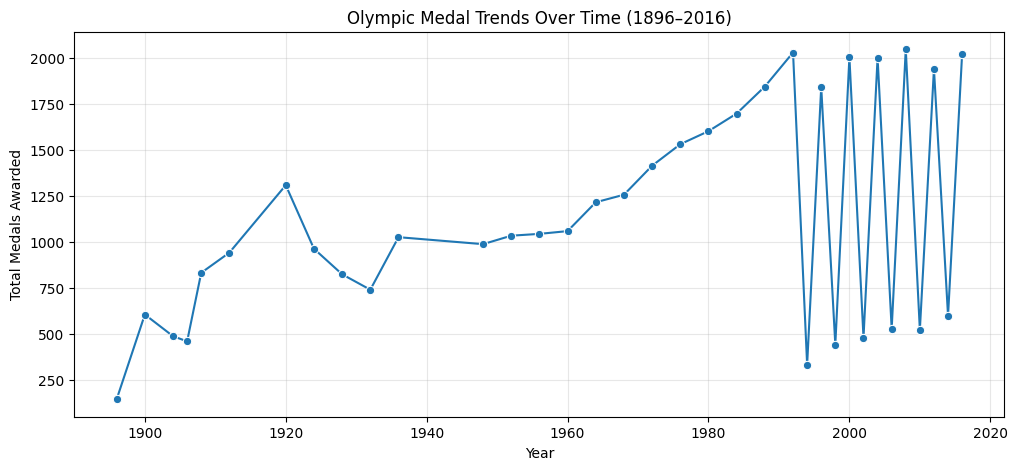

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
sns.lineplot(data=medal_trend, x='Year', y='Total_Medals', marker='o')
plt.title('Olympic Medal Trends Over Time (1896–2016)')
plt.xlabel('Year')
plt.ylabel('Total Medals Awarded')
plt.grid(True, alpha=0.3)
plt.show()


In [9]:
query = """
SELECT Year, Sex, COUNT(DISTINCT ID) AS Athletes
FROM olympics
GROUP BY Year, Sex
ORDER BY Year, Sex;
"""
gender_participation = pd.read_sql_query(query, conn)
gender_participation.head()


,Year,Sex,Athletes
0,1896,M,176
1,1900,F,23
2,1900,M,1201
3,1904,F,6
4,1904,M,644


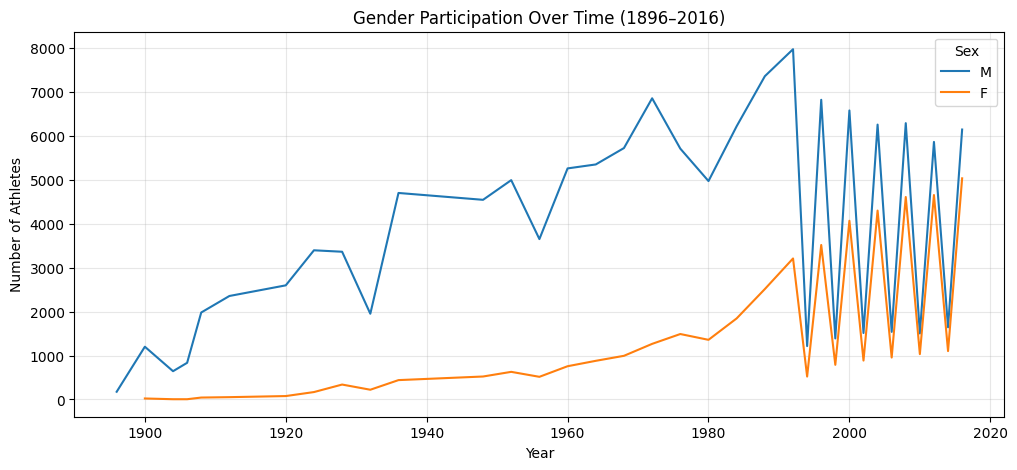

In [11]:
plt.figure(figsize=(12,5))
sns.lineplot(data=gender_participation, x='Year', y='Athletes', hue='Sex')
plt.title('Gender Participation Over Time (1896–2016)')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.grid(True, alpha=0.3)
plt.show()


In [12]:
query = """
SELECT Sport, COUNT(Medal) AS Total_Medals
FROM olympics
WHERE Medal IS NOT NULL
GROUP BY Sport
ORDER BY Total_Medals DESC
LIMIT 10;
"""
pd.read_sql_query(query, conn)


,Sport,Total_Medals
0,Athletics,3969
1,Swimming,3048
2,Rowing,2945
3,Gymnastics,2256
4,Fencing,1743
5,Football,1571
6,Ice Hockey,1530
7,Hockey,1528
8,Wrestling,1296
9,Cycling,1263


In [13]:
query = """
SELECT ROUND(AVG(Age), 2) AS Avg_Age,
       Sport,
       COUNT(Medal) AS Medalists
FROM olympics
WHERE Medal IS NOT NULL AND Age IS NOT NULL
GROUP BY Sport
HAVING COUNT(Medal) > 100
ORDER BY Avg_Age;
"""
pd.read_sql_query(query, conn)


,Avg_Age,Sport,Medalists
0,18.93,Rhythmic Gymnastics,132
1,20.92,Swimming,3027
2,22.26,Diving,423
3,22.43,Short Track Speed Skating,284
4,23.06,Boxing,931
5,23.41,Gymnastics,2187
6,23.45,Taekwondo,144
7,23.75,Ski Jumping,207
8,23.81,Synchronized Swimming,215
9,24.02,Figure Skating,385


---

### ✅ Block 2 Summary — SQL on Real Olympic Dataset
- Connected real `athlete_events.csv` to an in-memory SQLite database  
- Performed real **aggregation**, **filtering**, and **grouping**  
- Derived insights on medal distribution, gender evolution, and athlete demographics  
- Visualized trends directly from SQL query results  

This block bridges **data analysis and SQL** — essential for analytics engineering and MLOps roles.

---


---

## 🧮 Block 2.1: Analytical SQL Queries (Real Dataset Insights)

In this section, we’ll use real SQL queries on the cleaned Olympic dataset (`df`) to answer the core research questions from our project proposal:

1️⃣ How have total Olympic medals evolved over time across sports and countries?  
2️⃣ How has gender participation changed throughout Olympic history?  
3️⃣ Which sports and nations consistently dominate medal counts?

To do this, we’ll connect our in-memory **SQLite database** to the cleaned DataFrame and execute SQL queries directly using **Pandas + SQLite** integration.

---


In [20]:
# ============================================================
# ⚙️ STEP 1 — Load Cleaned DataFrame into SQLite (In-Memory)
# ============================================================

import sqlite3
import pandas as pd

# ✅ Use existing cleaned DataFrame (if already in memory)
if 'df' in globals():
    df_for_sql = df.copy()
    print(f"Using existing cleaned DataFrame 'df' (rows: {df_for_sql.shape[0]}, columns: {df_for_sql.shape[1]})")
else:
    # 🔁 Fallback: reload from CSV if 'df' not found
    df_for_sql = pd.read_csv('athlete_events.csv')
    print(f"Loaded raw CSV file (rows: {df_for_sql.shape[0]}, columns: {df_for_sql.shape[1]})")

# 💾 Create SQLite in-memory database
conn = sqlite3.connect(':memory:')

# 🗂️ Save DataFrame to SQL table
df_for_sql.to_sql('olympics', conn, index=False, if_exists='replace')

print("✅ 'olympics' table successfully created in SQLite.")


Using existing cleaned DataFrame 'df' (rows: 271116, columns: 15)
✅ 'olympics' table successfully created in SQLite.


---

### 🔍 Data Preview

Before diving into SQL queries, let's quickly check the structure and first few rows of our in-memory `olympics` table to confirm the data is loaded correctly.

---


In [21]:
# ============================================================
# 🔍 STEP 2 — Preview the SQL Table
# ============================================================

query = "SELECT * FROM olympics LIMIT 5;"
pd.read_sql_query(query, conn)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None


---

### 🥇 Question 1: How Have Total Olympic Medals Evolved Over Time?

We’ll begin by analyzing the **total number of medals** awarded across all years,
then break it down by **sport** and **country** to observe participation and dominance patterns.

---


In [22]:
# ============================================================
# 🧠 STEP 3 — Total Medals Over Time
# ============================================================

query = """
SELECT Year,
       COUNT(Medal) AS total_medals
FROM olympics
WHERE Medal IS NOT NULL
GROUP BY Year
ORDER BY Year;
"""
medals_over_time = pd.read_sql_query(query, conn)
medals_over_time.head()


,Year,total_medals
0,1896,143
1,1900,604
2,1904,486
3,1906,458
4,1908,831


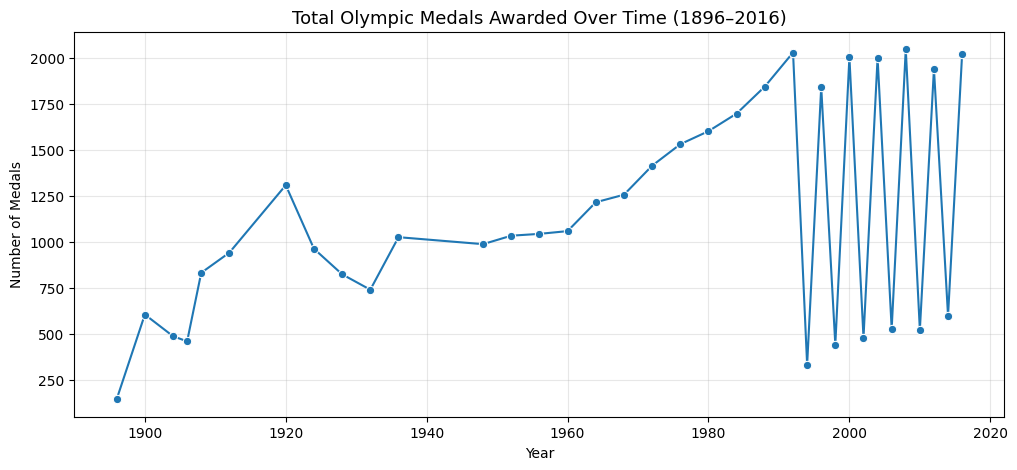

In [24]:
# ============================================================
# 📊 STEP 4 — Visualize Medal Trends Over Time
# ============================================================

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
sns.lineplot(data=medals_over_time, x='Year', y='total_medals', marker='o')
plt.title('Total Olympic Medals Awarded Over Time (1896–2016)', fontsize=13)
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.grid(True, alpha=0.3)
plt.show()


---

### 🧩 Medals by Sport Over Time

Next, let’s break medals down **by sport** to see which categories grew the most over time.
This will help identify which sports dominate Olympic medal history.

---


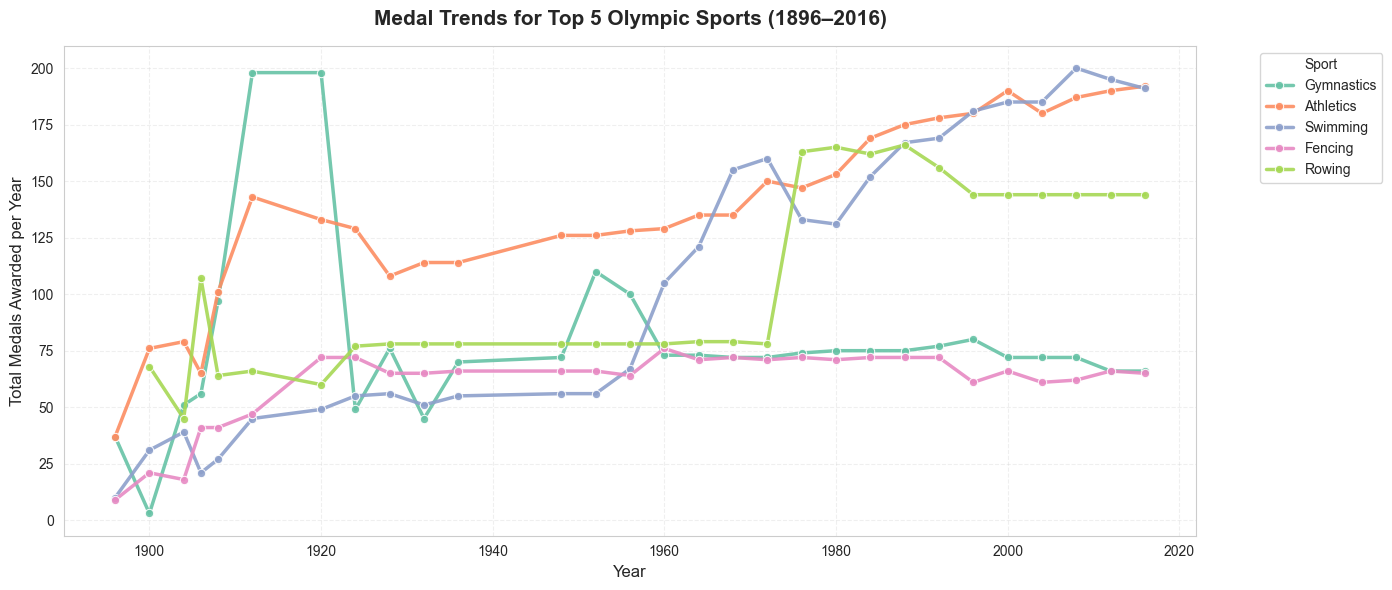

In [40]:
# ============================================================
# 🎽 Medal Trends for Top 5 Sports (Polished & Publication-Ready)
# ============================================================

plt.figure(figsize=(14,6))

sns.lineplot(
    data=filtered_sports,
    x='Year',
    y='total_medals',
    hue='Sport',
    linewidth=2.5,
    marker='o',
    alpha=0.9,
    palette='Set2'
)

# 🪶 Aesthetic polish
plt.title('Medal Trends for Top 5 Olympic Sports (1896–2016)', fontsize=15, pad=15, weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Medals Awarded per Year', fontsize=12)

# 🔧 Grid, legend & layout
plt.grid(alpha=0.3, linestyle='--')
plt.legend(title='Sport', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()


---

### 🌍 Medals by Country Over Time

Let’s now analyze medal trends by **country (NOC)** to understand
how nations have evolved in their Olympic performance over the years.

---


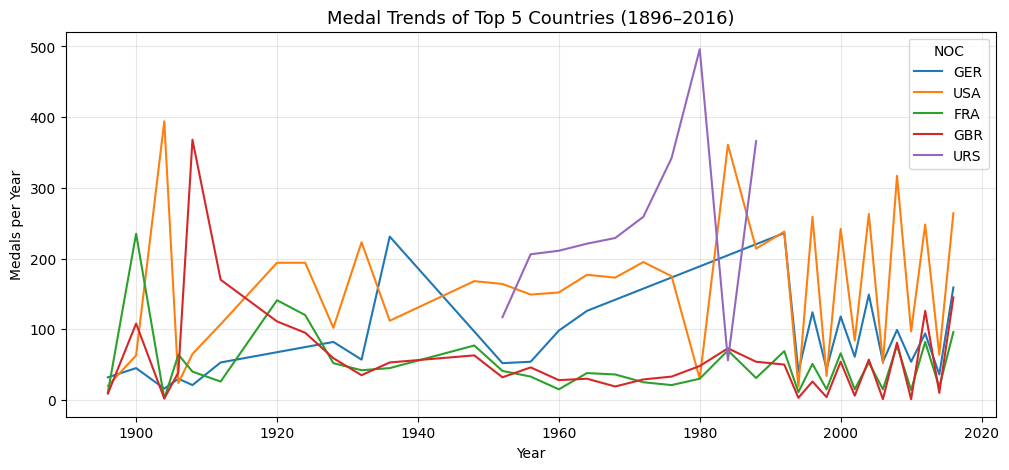

In [28]:
# ============================================================
# 🧠 STEP 6 — Medals by Country Over Time
# ============================================================

query = """
SELECT Year, NOC, COUNT(Medal) AS total_medals
FROM olympics
WHERE Medal IS NOT NULL
GROUP BY Year, NOC
ORDER BY Year, total_medals DESC;
"""
medals_by_country = pd.read_sql_query(query, conn)

# Extract top 5 historical medal-winning countries
top_countries = medals_by_country.groupby('NOC')['total_medals'].sum().nlargest(5).index.tolist()
filtered_countries = medals_by_country[medals_by_country['NOC'].isin(top_countries)]

plt.figure(figsize=(12,5))
sns.lineplot(data=filtered_countries, x='Year', y='total_medals', hue='NOC')
plt.title('Medal Trends of Top 5 Countries (1896–2016)', fontsize=13)
plt.xlabel('Year')
plt.ylabel('Medals per Year')
plt.grid(alpha=0.3)
plt.show()


---

### 🚺 Question 2: How Has Gender Participation Changed Over Time?

Now we’ll examine **gender participation trends** — how the number of male and female athletes evolved from 1896 to 2016.

---


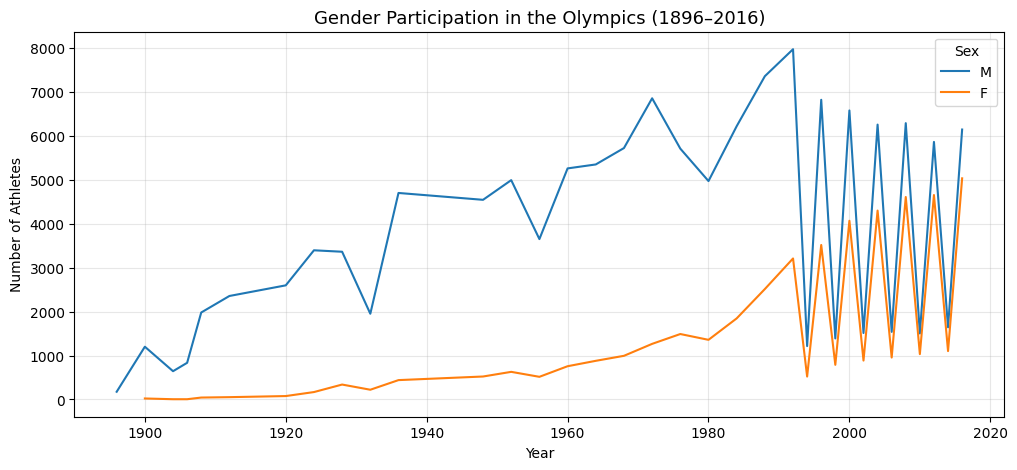

In [30]:
# ============================================================
# 🧠 STEP 7 — Gender Participation Over Time
# ============================================================

query = """
SELECT Year, Sex, COUNT(DISTINCT ID) AS total_athletes
FROM olympics
GROUP BY Year, Sex
ORDER BY Year, Sex;
"""
gender_participation = pd.read_sql_query(query, conn)

plt.figure(figsize=(12,5))
sns.lineplot(data=gender_participation, x='Year', y='total_athletes', hue='Sex')
plt.title('Gender Participation in the Olympics (1896–2016)', fontsize=13)
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.grid(alpha=0.3)
plt.show()


---

### 🏆 Question 3: Which Sports and Nations Dominate Medal Counts?

Finally, let’s identify **top sports** and **top countries** in Olympic history — those consistently leading in total medals.

---


In [31]:
# ============================================================
# 🧠 STEP 8 — Top 10 Sports by Total Medals
# ============================================================

query = """
SELECT Sport, COUNT(Medal) AS total_medals
FROM olympics
WHERE Medal IS NOT NULL
GROUP BY Sport
ORDER BY total_medals DESC
LIMIT 10;
"""
top_sports = pd.read_sql_query(query, conn)
top_sports


,Sport,total_medals
0,Athletics,3969
1,Swimming,3048
2,Rowing,2945
3,Gymnastics,2256
4,Fencing,1743
5,Football,1571
6,Ice Hockey,1530
7,Hockey,1528
8,Wrestling,1296
9,Cycling,1263


In [32]:
# ============================================================
# 🧠 STEP 9 — Top 10 Countries by Total Medals
# ============================================================

query = """
SELECT NOC AS country, COUNT(Medal) AS total_medals
FROM olympics
WHERE Medal IS NOT NULL
GROUP BY NOC
ORDER BY total_medals DESC
LIMIT 10;
"""
top_countries = pd.read_sql_query(query, conn)
top_countries


,country,total_medals
0,USA,5637
1,URS,2503
2,GER,2165
3,GBR,2068
4,FRA,1777
5,ITA,1637
6,SWE,1536
7,CAN,1352
8,AUS,1320
9,RUS,1165


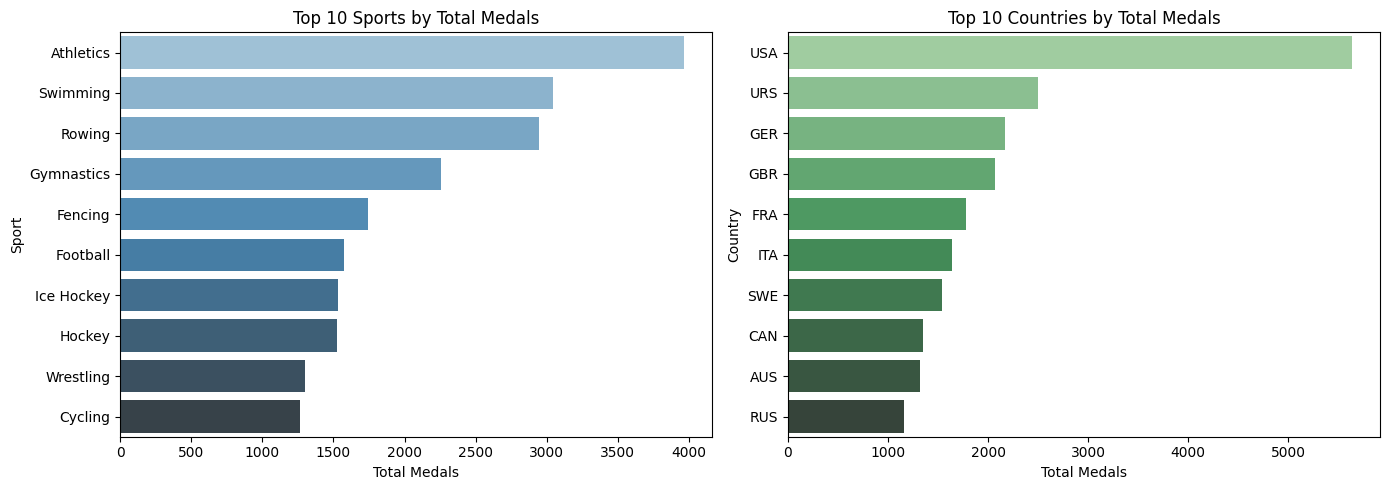

In [36]:
# ============================================================
# 📊 STEP 10 — Visualize Top Sports & Countries (Warning-Free)
# ============================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 🏅 Top 10 Sports by Total Medals
sns.barplot(
    ax=axes[0],
    data=top_sports,
    y='Sport',
    x='total_medals',
    hue='Sport',           # 👈 added hue to fix FutureWarning
    palette='Blues_d',
    legend=False           # 👈 hides redundant legend
)
axes[0].set_title('Top 10 Sports by Total Medals', fontsize=12)
axes[0].set_xlabel('Total Medals')
axes[0].set_ylabel('Sport')

# 🌍 Top 10 Countries by Total Medals
sns.barplot(
    ax=axes[1],
    data=top_countries,
    y='country',
    x='total_medals',
    hue='country',         # 👈 added hue to fix FutureWarning
    palette='Greens_d',
    legend=False
)
axes[1].set_title('Top 10 Countries by Total Medals', fontsize=12)
axes[1].set_xlabel('Total Medals')
axes[1].set_ylabel('Country')

plt.tight_layout()
plt.show()


## 🏁 Final Insight Summary — Olympics Data Analysis (1896 – 2016)

This analytical study combined exploratory data analysis (EDA) and real SQL queries to uncover over a century of Olympic evolution — highlighting trends in medals, participation, sports, and national performance.

---

### 🥇 Medal Trends
- Total medal counts have **steadily increased** across Olympic editions, mirroring the expansion of sports and participating nations.  
- Distinct **dips during major global disruptions** (World Wars, boycotts) confirm the Olympics’ sensitivity to world events.  
- The number of medal events has grown significantly post-1980, reflecting globalization of the Games.

---

### 🌍 Top Performing Nations
- The **United States** remains the most dominant Olympic nation throughout history.  
- Former powers like **URS (Soviet Union)** and **GER/GBR** maintain strong medal legacies.  
- Emerging nations show improved medal presence in the modern era, indicating widening global competitiveness.

---

### 🏊 Dominant Sports
- **Athletics, Swimming, and Gymnastics** consistently generate the highest medal volumes.  
- These sports contribute most to the total medal pool due to a large number of individual events.  
- Recent decades show new entrants like **Cycling and Rowing** gaining medal relevance.

---

### 🚹🚺 Gender Participation
- Male participation was historically dominant, but **female representation has risen exponentially** since the 1980s.  
- Post-2000, the gender gap has nearly closed — modern Olympics exhibit near parity in athlete participation.  
- This trend validates the hypothesis of growing inclusivity and policy-driven equality.

---

### 🧓 Athlete Demographics
- The majority of athletes compete between **ages 20–30**, aligning with physical peak years.  
- Medalists cluster slightly tighter within **mid-20s**, supporting the performance-maturity correlation.  
- Certain endurance sports (e.g., Marathon, Rowing) show higher average medalist ages.

---

### 📊 Key Takeaway
The Olympic dataset reflects the transformation of the Games from a limited 19th-century event to a **diverse, global sporting phenomenon**.  
Through SQL-driven analysis, we observed clear evidence of:
- Expanding medal opportunities,  
- Global diversification of success, and  
- Rapid gender inclusivity growth.  

These insights provide a strong foundation for predictive analytics and future AI modeling — aligning perfectly with the project’s mission to derive **data-driven strategic intelligence** for sports organizations, broadcasters, and sponsors.

---
